In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "ibm-hr-analytics-attrition-dataset"

In [2]:
install.packages("ggplot2")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘ggplot2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘gridExtra’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
data = read.csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(data)
nrow(data)
names(data)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


[1] 1470

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

In [4]:
#Summary of the columns 
summary(data)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

In [5]:
#Checking variable types and values
str(data)

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

In [6]:
#Checking null values 
colSums(is.na(data))

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

In [7]:
#Checking unique values of column
unique_values <- sapply(data, unique)
names(unique_values) <- names(data)
unique_values

$Age
 [1] 41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43 50
[26] 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60

$Attrition
[1] "Yes" "No" 

$BusinessTravel
[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"       

$DailyRate
  [1] 1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346  103
 [16] 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691  477  705
 [31]  924 1459  125  895  813 1273  869  890  852 1141  464 1240 1357  994  721
 [46] 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515  853 1142  655 1115
 [61]  427  653  989 1435 1223  836 1195 1339  664  318 1225 1328 1082  548  132
 [76]  746  776  193  397  945 1214  111  573 1153 1400  541  432  288  669  530
 [91]  632 1334  638 1093 1217 1353  120  682  489  807  827  871  665 1040 1420
[106]  240 1280  534 1456  658  142 1127 1031 1189 1354 1467  922  394 1312  750
[121]  441  684  249  841  147  528  594  470  957  542  802 1355 1150 1329  959
[136] 1033 1316  364  438  689  201 1427  857  933 1181 1395  662 1436  194  967
[151] 1496 1169 1145  630  303 1256  440 1450 1452  465  702 1157  602 1480 1268
[166]  713  134  526 1380  140  629 1356  328 1084  931  692 1069  313  894  556
[181] 1344  290  138  926 1261  472 1002  878  905 1180  121 1136  635 1151  644
[196] 1045  829 1242 1469  896  992 1052 1147 1396  663  119  979  319 1413  944
[211] 1323  532  818  854 1034  771 1401 1431  976 1411 1300  252 1327  832 1017
[226] 1199  504  505  916 1247  685  269 1416  833  307 1311  128  488  529 1210
[241] 1463  675 1385 1403  452  666 1158  228  996  728 1315  322 1479  797 1070
[256]  442  496 1372  920  688 1449 1117  636  506  444  950  889  555  230 1232
[271]  566 1302  812 1476  218 1132 1105  906  849  390  106 1249  192  553  117
[286]  185 1091  723 1220  588 1377 1018 1275  798  672 1162  508 1482  559  210
[301]  928 1001  549 1124  738  570 1130 1192  343  144 1296 1309  483  810  544
[316] 1062 1319  641 1332  756  845  593 1171  350  921 1144  143 1046  575  156
[331] 1283  755  304 1178  329 1362 1371  202  253  164 1107  759 1305  982  821
[346] 1381  480 1473  891 1063  645 1490  317  422 1485 1368 1448  296 1398 1349
[361]  986 1099 1116 1499  983 1009 1303 1274 1277  587  413 1276  988 1474  163
[376]  267  619  302  443  828  561  426  232 1306 1094  509  775  195  258  471
[391]  799  956  535 1495  446 1245  703  823 1246  622 1287  448  254 1365  538
[406]  525  558  782  362 1236 1112  204 1343  604 1216  646  160  238 1397  306
[421]  991  482 1176  913 1076  727  885  243  806  817 1410 1207 1442  693  929
[436]  562  608  580  970 1179  294  314  316  654  168  381  217  501  650  141
[451]  804  975 1090  346  430  268  167  621  527  883  954  310  719  725  715
[466]  657 1146  182  376  571  384  791 1111 1243 1092 1325  805  213  118  676
[481] 1252  286 1258  932 1041  859  720  946 1184  436  589  760  887 1318  625
[496]  180  586 1012  661  930  342 1230 1271 1278  607  130  300  583 1418 1269
[511]  379  395 1265 1222  341  868 1231  102  881 1383 1075  374 1086  781  177
[526]  500 1425 1454  617 1085  995 1122  618  546  462 1198 1272  154 1137 1188
[541]  188 1333  867  263  938  129  616  498 1404 1053  289 1376  231  152  882
[556]  903 1379  335  722  461  974 1126  840 1134  248  955  939 1391 1206  287
[571] 1441  109 1066  277  466 1055  265  135  247 1035  266  145 1038 1234 1109
[586] 1089  788  124  660 1186 1464  796  415  769 1003 1366  330 1492 1204  309
[601] 1330  469  697 1262 1050  770  406  203 1308  984  439  793 1451 1182  174
[616]  490  718  433  773  603  874  367  199  481  647 1384  902  819  862 1457
[631]  977  942 1402 1421 1361  917  200  150  179  696  116  363  107 1465  458
[646] 1212 1103  966 1010  326 1098  969 1167  694 1320  536  373  599  251  131
[661]  237 1429  648  735  531  429  968  879  640  412  848  360 1138  325 1322
[676]  299 1030  634  524  256 1060  935  495  282  206  943  523  507  601  855
[691] 129

In [8]:
#Removing Duplicate rows if any (There were no duplicate values)
data = unique(data)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6
7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,⋯,1,80,3,12,3,2,1,0,0,0
8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,⋯,2,80,1,1,2,3,1,0,0,0
9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,⋯,2,80,0,10,2,3,9,7,1,8


In [11]:
train <- sample(1:nrow(data), 0.7 * nrow(data))
train_data <- data[train, ]
test_data <- data[-train, ]
nrow(train_data)
nrow(test_data)

[1] 1029

[1] 441

In [12]:
# Dropped unnecessary columns 
columns_to_drop <- c("Over18", "EmployeeCount", "StandardHours")
data <- data[, -which(names(data) %in% columns_to_drop)]
names(data)


[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeNumber"           "EnvironmentSatisfaction" 
[11] "Gender"                   "HourlyRate"              
[13] "JobInvolvement"           "JobLevel"                
[15] "JobRole"                  "JobSatisfaction"         
[17] "MaritalStatus"            "MonthlyIncome"           
[19] "MonthlyRate"              "NumCompaniesWorked"      
[21] "OverTime"                 "PercentSalaryHike"       
[23] "PerformanceRating"        "RelationshipSatisfaction"
[25] "StockOptionLevel"         "TotalWorkingYears"       
[27] "TrainingTimesLastYear"    "WorkLifeBalance"         
[29] "YearsAtCompany"           "YearsInCurrentRole"      
[31] "YearsSinceLastPromotion"  "YearsWithCurrManager"

In [13]:
num_features <- c("Age", "DailyRate", "DistanceFromHome", "HourlyRate", "EmployeeCount",
                "MonthlyIncome", "MonthlyRate","NumCompaniesWorked", "PercentSalaryHike",
                "StandardHours", "TrainingTimesLastYear", "TotalWorkingYears", "YearsAtCompany", 
                "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager")

cat_features <- c('BusinessTravel', 'Department','Education', 'EducationField', 'EnvironmentSatisfaction', 
                'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 
                'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                'TrainingTimesLastYear')

target <- c('Attrition')

corrplot 0.92 loaded



,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000000,0.0106609426,-0.001686120,0.208033731,-0.010145467,0.010146428,0.024286543,0.029819959,0.509604228,-0.0048918771,⋯,0.0019038955,0.0535347197,0.037509712,0.680380536,-0.019620819,-0.021490028,0.311308770,0.212901056,0.216513368,0.2020886024
DailyRate,0.010660943,1.0000000000,-0.004985337,-0.016806433,-0.050990434,0.018354854,0.023381422,0.046134874,0.002966335,0.0305710078,⋯,0.0004732963,0.0078460310,0.042142796,0.014514739,0.002452543,-0.037848051,-0.034054768,0.009932015,-0.033228985,-0.0263631782
DistanceFromHome,-0.001686120,-0.0049853374,1.000000000,0.021041826,0.032916407,-0.016075327,0.031130586,0.008783280,0.005302731,-0.0036688392,⋯,0.0271096185,0.0065574746,0.044871999,0.004628426,-0.036942234,-0.026556004,0.009507720,0.018844999,0.010028836,0.0144060484
Education,0.208033731,-0.0168064332,0.021041826,1.000000000,0.042070093,-0.027128313,0.016774829,0.042437634,0.101588886,-0.0112961167,⋯,-0.0245387912,-0.0091183767,0.018422220,0.148279697,-0.025100241,0.009819189,0.069113696,0.060235554,0.054254334,0.0690653783
EmployeeNumber,-0.010145467,-0.0509904337,0.032916407,0.042070093,1.000000000,0.017620802,0.035179212,-0.006887923,-0.018519194,-0.0462467349,⋯,-0.0203588251,-0.0698614115,0.062226693,-0.014365198,0.023603170,0.010308641,-0.011240464,-0.008416312,-0.009019064,-0.0091966453
EnvironmentSatisfaction,0.010146428,0.0183548543,-0.016075327,-0.027128313,0.017620802,1.000000000,-0.049856956,-0.008277598,0.001211699,-0.0067843526,⋯,-0.0295479523,0.0076653835,0.003432158,-0.002693070,-0.019359308,0.027627295,0.001457549,0.018007460,0.016193606,-0.0049987226
HourlyRate,0.024286543,0.0233814215,0.031130586,0.016774829,0.035179212,-0.049856956,1.000000000,0.042860641,-0.027853486,-0.0713346244,⋯,-0.0021716974,0.0013304528,0.050263399,-0.002333682,-0.008547685,-0.004607234,-0.019581616,-0.024106220,-0.026715586,-0.0201232002
JobInvolvement,0.029819959,0.0461348740,0.008783280,0.042437634,-0.006887923,-0.008277598,0.042860641,1.000000000,-0.012629883,-0.0214759103,⋯,-0.0290713334,0.0342968206,0.021522640,-0.005533182,-0.015337826,-0.014616593,-0.021355427,0.008716963,-0.024184292,0.0259758079
JobLevel,0.509604228,0.0029663349,0.005302731,0.101588886,-0.018519194,0.001211699,-0.027853486,-0.012629883,1.000000000,-0.0019437080,⋯,-0.0212220821,0.0216415105,0.013983911,0.782207805,-0.018190550,0.037817746,0.534738687,0.389446733,0.353885347,0.3752806078
JobSatisfaction,-0.004891877,0.0305710078,-0.003668839,-0.011296117,-0.046246735,-0.006784353,-0.071334624,-0.021475910,-0.001943708,1.0000000000,⋯,0.0022971971,-0.0124535932,0.010690226,-0.020185073,-0.005779335,-0.019458710,-0.003802628,-0.002304785,-0.018213568,-0.0276562139


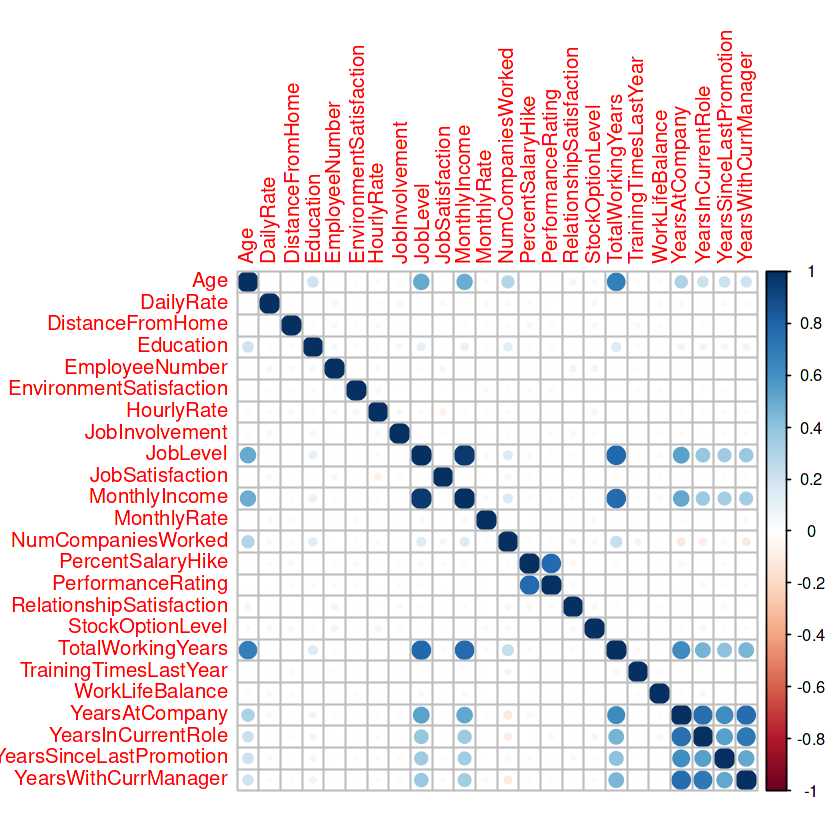

In [14]:
# correlation matrix
library(corrplot)
correlation_matrix <- cor(data %>% select_if(is.numeric))
correlation_matrix
corrplot(correlation_matrix, method = "circle")

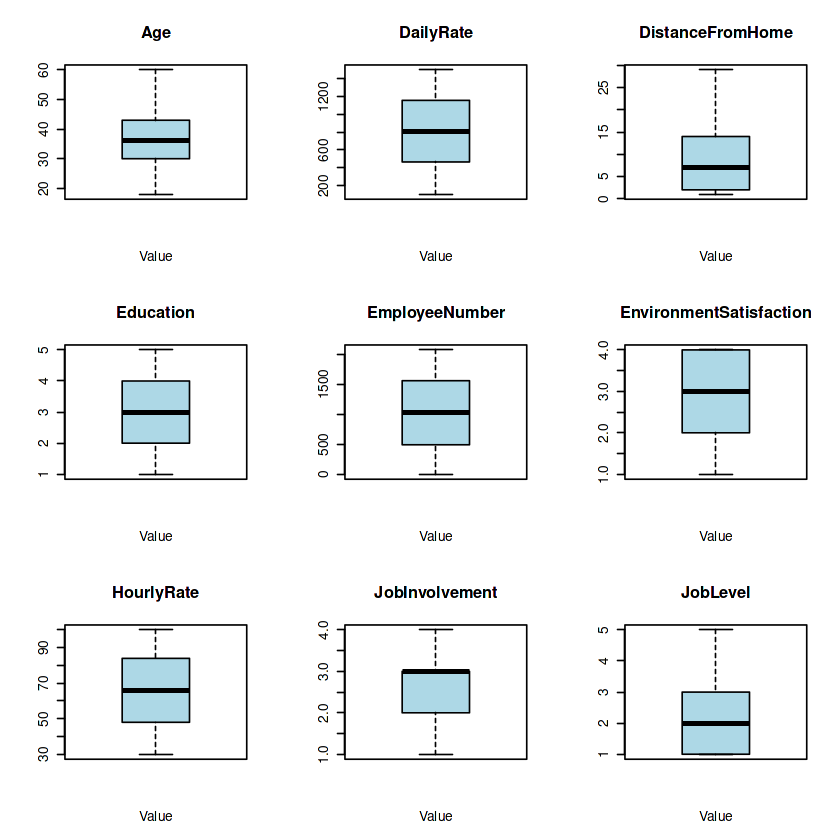

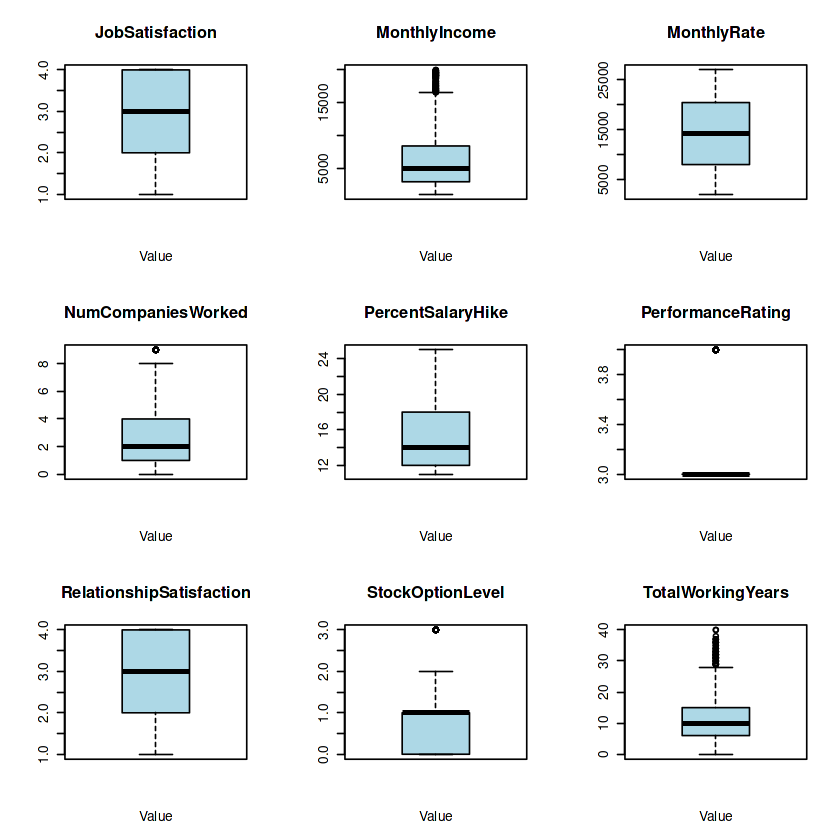

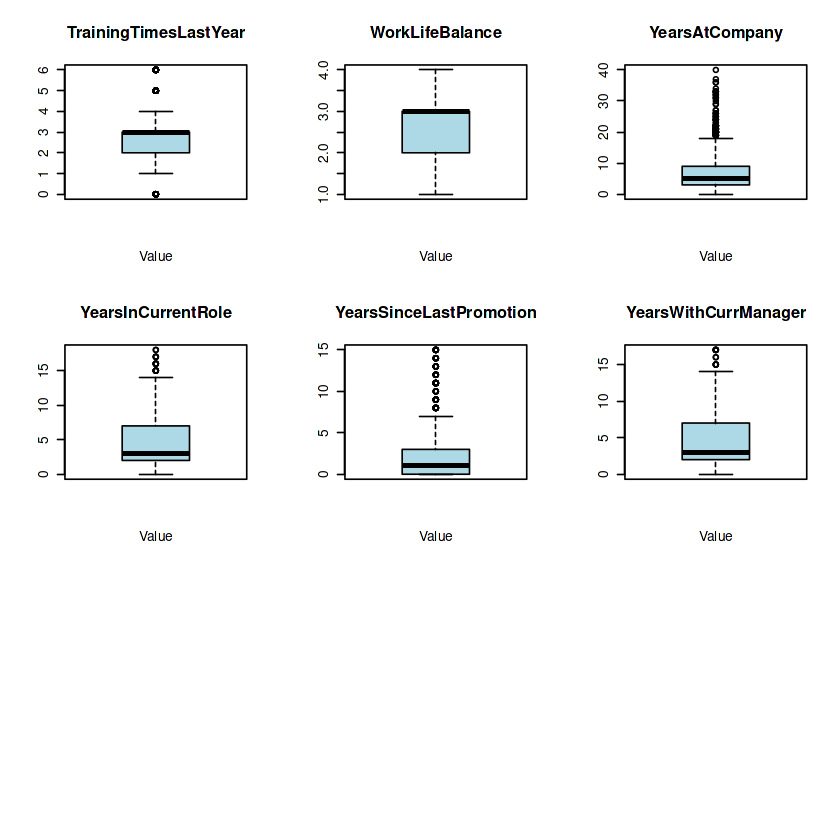

In [15]:
par(mfrow=c(3,3))  # 3x3 grid for the histograms, adjust as needed

# Loop through each column in the data frame and create a histogram if it's numeric
for (col in colnames(data)) {
  if (is.numeric(data[[col]])) {
    boxplot(data[[col]], main=col, xlab="Value", col="lightblue", border="black")
  }
}

# Reset the layout to a single plot
par(mfrow=c(1,1))

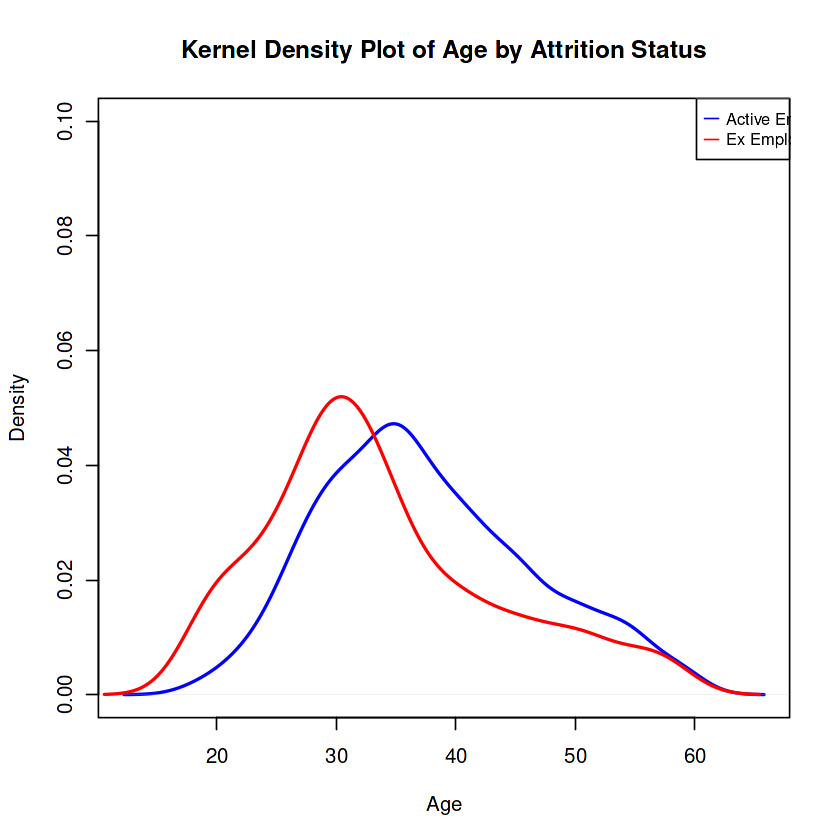

In [16]:
# Get the density estimates for 'Age' for employees with 'Attrition' as 'No'
density_no <- density(data$Age[data$Attrition == 'No'])

# Get the density estimates for 'Age' for employees with 'Attrition' as 'Yes'
density_yes <- density(data$Age[data$Attrition == 'Yes'])

# Plot the kernel density estimates
plot(density_no, col = "blue", main = "Kernel Density Plot of Age by Attrition Status", xlab = "Age", ylab = "Density", lwd = 2, ylim = c(0, 0.1))
lines(density_yes, col = "red", lwd = 2)

# Add legend
legend("topright", legend = c("Active Employee", "Ex Employee"), col = c("blue", "red"), lty = 1, cex = 0.8)

# Show the plot

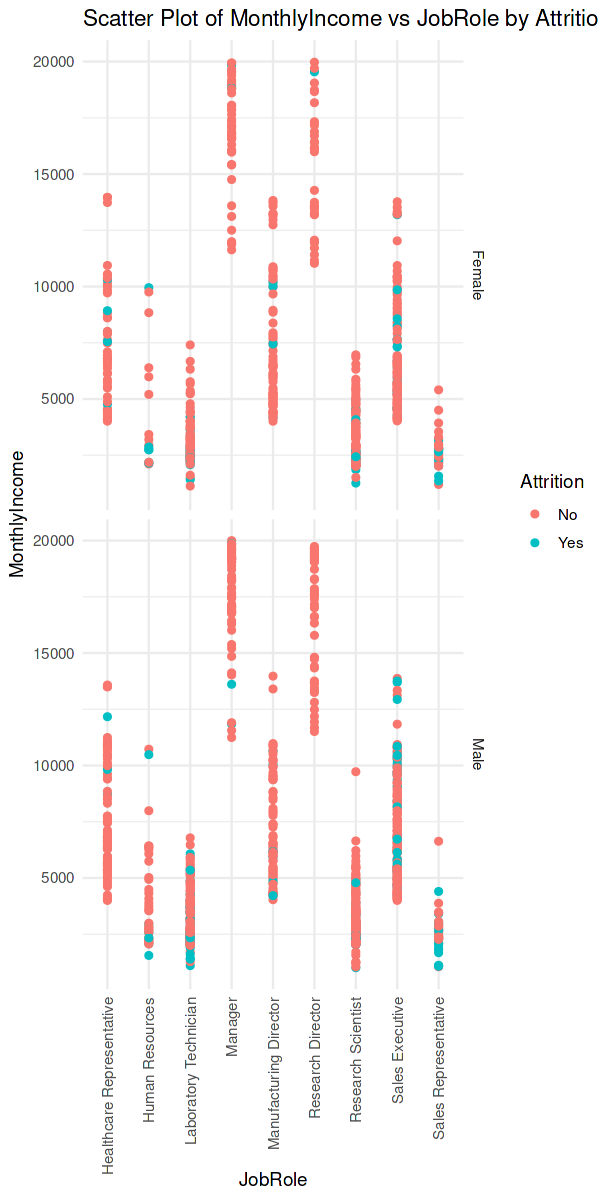

In [17]:
# Load the ggplot2 package
library(ggplot2)

# Set the figure size
options(repr.plot.width = 5, repr.plot.height = 10)

# Create the scatter plot with facets
ggplot(data, aes(x = JobRole, y = MonthlyIncome, color = Attrition)) +
  geom_point() +
  facet_grid(Gender ~ .) +
  labs(title = "Scatter Plot of MonthlyIncome vs JobRole by Attrition Status and Gender",
       x = "JobRole",
       y = "MonthlyIncome",
       color = "Attrition") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


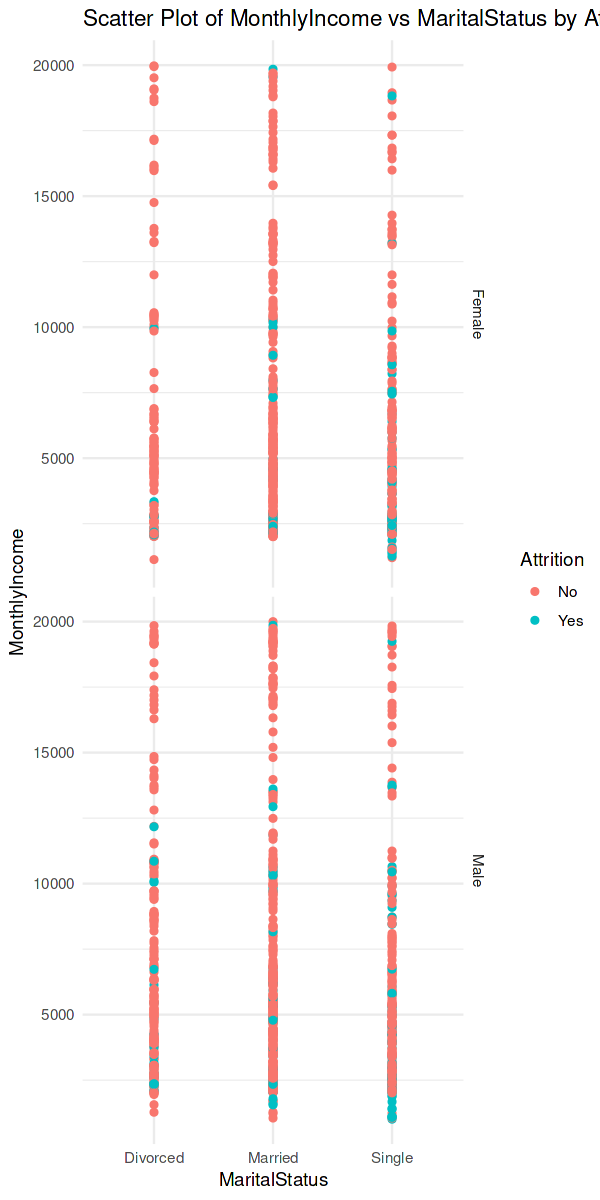

In [18]:
# Set the figure size
options(repr.plot.width = 5, repr.plot.height = 10)

# Create the scatter plot with facets
ggplot(data, aes(x = MaritalStatus, y = MonthlyIncome, color = Attrition)) +
  geom_point() +
  facet_grid(Gender ~ .) +
  labs(title = "Scatter Plot of MonthlyIncome vs MaritalStatus by Attrition Status and Gender",
       x = "MaritalStatus",
       y = "MonthlyIncome",
       color = "Attrition") +
  theme_minimal()

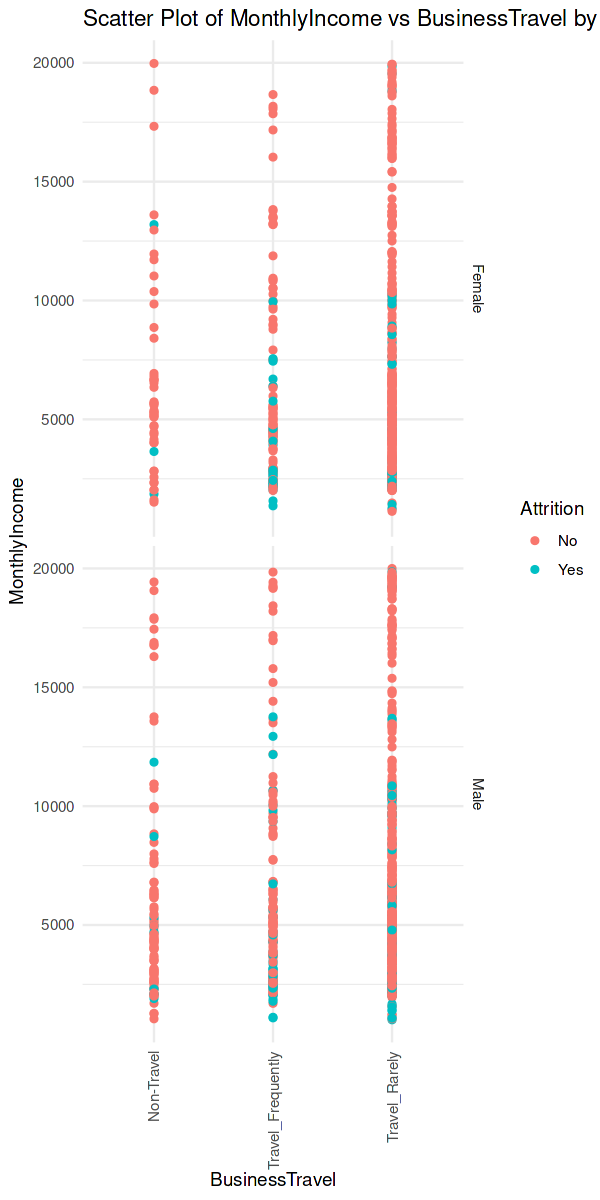

In [19]:
# Set the figure size
options(repr.plot.width = 5, repr.plot.height = 10)

# Create the scatter plot with facets
ggplot(data, aes(x = BusinessTravel, y = MonthlyIncome, color = Attrition)) +
  geom_point() +
  facet_grid(Gender ~ .) +
  labs(title = "Scatter Plot of MonthlyIncome vs BusinessTravel by Attrition Status and Gender",
       x = "BusinessTravel",
       y = "MonthlyIncome",
       color = "Attrition") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

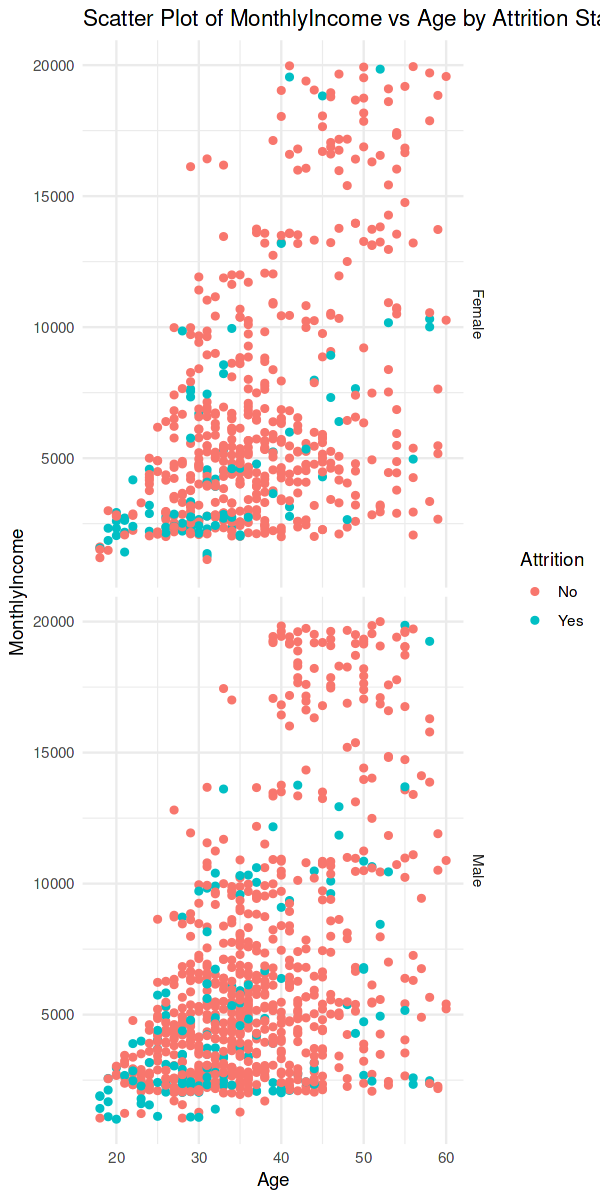

In [20]:
# Set the figure size
options(repr.plot.width = 5, repr.plot.height = 10)

# Create the scatter plot with facets
ggplot(data, aes(x = Age, y = MonthlyIncome, color = Attrition)) +
  geom_point() +
  facet_grid(Gender ~ .) +
  labs(title = "Scatter Plot of MonthlyIncome vs Age by Attrition Status and Gender",
       x = "Age",
       y = "MonthlyIncome",
       color = "Attrition") +
  theme_minimal()

In [21]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [22]:
# Logistic regression
set.seed(1)
glm.fit <- glm(Attrition ~ ., data = train_data, family = binomial)
glm.probs <- predict(glm.fit, type = "response")

glm.pred <- rep("No", nrow(test_data))
glm.pred[glm.probs > .3] <- "Yes"
table(glm.pred, test_data$Attrition)
mean(glm.pred == test_data$Attrition)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [ ]:
#LDA
set.seed(1)
lda.fit <- lda(Attrition ~ ., data = train_data)
lda.pred <- predict(lda.fit, test_data, threshold = 0.3)
lda.class <- lda.pred$class
table(lda.class, test_data$Attrition)
mean(lda.class == test_data$Attrition)

In [ ]:
# Naive Bayes
library(e1071)
naive_bayes_model <- naiveBayes(Attrition ~ ., data = train_data, prior = c(0.5, 0.5))

# Make predictions on the test set
predictions <- predict(naive_bayes_model, test_data)
confusion_matrix <- table(predictions, test_data$Attrition)
confusion_matrix
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Confusion Matrix:\n", confusion_matrix, "\n")
cat("Accuracy:", accuracy, "\n")

In [ ]:
# Classification tree
library(tree)

# Fit a classification tree model
clf <- tree(Attrition ~ ., data = train_data)

summary(clf)
plot(clf)
text(clf, pretty=0)

# Perform cross-validation to find the best model
cv_results <- cv.tree(clf)

# Identify the best complexity parameter
best_cp <- cv_results$size[which.min(cv_results$dev)]
best_cp

# Prune the tree with the best value obtained
pruned_clf <- prune.tree(clf, best = best_cp, method = "misclass")

# Print the pruned tree
plot(pruned_clf)
text(pruned_clf, pretty=0)

tree.pred <- predict(pruned_clf , test_data, type = "class")
#table(tree.pred, test_data$Attrition)

# Evaluate the accuracy of the predictions
conf_matrix <- table(tree.pred, test_data$Attrition)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(conf_matrix)
cat("Accuracy:", accuracy, "\n")

In [ ]:
#Bagging
library(randomForest)
set.seed(1)
bag.fit <- randomForest(Attrition ~ ., data =  train_data , mtry = 10, ntree= 300, importance = TRUE)
bag.fit
yhat.bag <- predict(bag.fit, test_data, threshold = 0.3, shrinkage = 0.1)
table(yhat.bag, test_data$Attrition)
(370+15)/441
importance(bag.fit)  

In [ ]:
#Random forest
library(randomForest)
set.seed(1)
bag.fit1 <- randomForest(Attrition ~ ., data =  train_data , mtry = 3,ntree= 300, importance = TRUE)
bag.fit1
yhat.bag1 <- predict(bag.fit1 , test_data, threshold = 0.3, shrinkage = 0.1)
table(yhat.bag1, test_data$Attrition)
(371+12)/441
importance(bag.fit1) 

In [ ]:
#Boosting
library(gbm)
library(caret)
set.seed(123)

# Create a train control object for 10-fold cross-validation
ctrl <- trainControl(method = "cv", number = 10, verboseIter = TRUE)

# Fit a boosting model with cross-validation
boost_model <- train(Attrition ~ ., data = train_data, method = "gbm",
                     trControl = ctrl, verbose = FALSE)

# Display the boosted model
print(boost_model)

# Plot variable importance
plot(boost_model$finalModel, main = "Variable Importance")

# Make predictions on new data
predictions <- predict(boost_model, newdata = test_data, threshold = 0.3)

# Evaluate the accuracy of the predictions
conf_matrix <- table(predictions, test_data$Attrition)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(conf_matrix)
cat("Accuracy:", accuracy, "\n")

In [ ]:
#SVM
# Build the Support Vector Machine (SVM) model
svm_model <- svm(Attrition ~ ., data = train_data[, -1], kernel = "radial", cost = 10)

# Make predictions on the test set
predictions <- predict(svm_model, test_data[, -1])
# Confusion matrix and accuracy
confusion_matrix <- table(predictions, test_data$Attrition)
confusion_matrix
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)

cat("Confusion Matrix:\n", confusion_matrix, "\n")
cat("Accuracy:", accuracy, "\n")